# **Closed-Form Solution**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# As we know equation of line, y= c0 + c1.x
# c0 is intercept and c1 is slope

x = np.array([1,2,3,4,5])
y= np.array([1,2,1.3,3.75,2.25])


In [ ]:

n = len(x)

x_mean = np.sum(x)/n #x_mean = np.mean(x)
y_mean = np.sum(y)/n #y_mean = np.mean(y)

In [ ]:
# c1= covariance(x,y)/variance(x)   OR   Sum of cross-deviations/Sum of squared deviations(SSD)

xy_covar = (np.sum(y*x) - n*y_mean*x_mean)/(len(x)-1)
x_var = (np.sum(x*x) - n*y_mean*x_mean)/(len(x)-1)

# calculating regression coefficients
c1 = xy_covar / x_var
c0 = y_mean - c1 * x_mean

print('y = ',c0,' + ',c1,'x')

y =  1.5309543568464734  +  0.1763485477178422 x


In [ ]:

y_pred = c0 + c1 * 2
print('Predicted value: ', y_pred)


Predicted value:  1.883651452282158


In [ ]:
def plot_regression_line(x, y, b):
# plotting the actual points
  plt.scatter(x, y, color = "m",marker = "o", s = 30)

# regression line
  y_pred = b[0] + b[1]*x
  plt.plot(x, y_pred, color = "g")

  plt.xlabel('x')
  plt.ylabel('y')


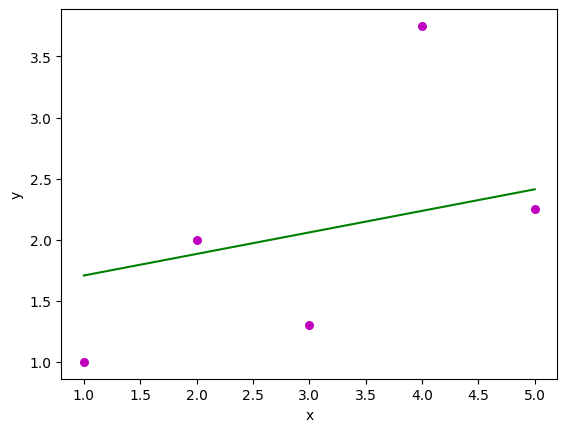

In [ ]:
c = [c0,c1]
plot_regression_line(x, y, c)

# **Gradient Descent**

In [ ]:
# Calculates the mean squared error (cost) for the given theta.
# theta = model parameters
def cost_function(features, targets, theta):
    m = len(features)
    predicted_y = theta[0] + theta[1] * features
    error = np.sum((predicted_y - targets) ** 2) / (2 * m)
    return error


In [ ]:
# Calculates the gradient of the cost function with respect to theta.
# Returns a array representing the gradient.
def gradient_function(features, targets, theta):

    m = len(features)
    predicted_y = theta[0] + theta[1] * features
    gradient = np.zeros(2)
    gradient[0] = np.sum(predicted_y - targets) / m
    gradient[1] = np.sum((predicted_y - targets) * features) / m
    return gradient


# Gradient descent for simple linear regression.
# Returns a array containing the final theta values.
def gradient_descent(features, targets, learning_rate, iterations):

    features = np.array(features)
    targets = np.array(targets)

    # Initialize variables
    theta = np.zeros(2)  # theta[0] is the intercept, theta[1] is the slope
    m = len(features)  # Number of data points

    # Gradient Descent Loop
    for _ in range(iterations):
        # Update theta values based on the gradient
        theta = theta - learning_rate * gradient_function(features, targets, theta)

    return theta


In [ ]:

learning_rate = 0.01
epochs = 1000
result = gradient_descent(x, y, learning_rate, epochs)
print(result)


[0.67086506 0.45661355]


In [ ]:
y_pred = result[0] + result[1] * 2
print('Predicted value: ', y_pred)


Predicted value:  1.584092155589627


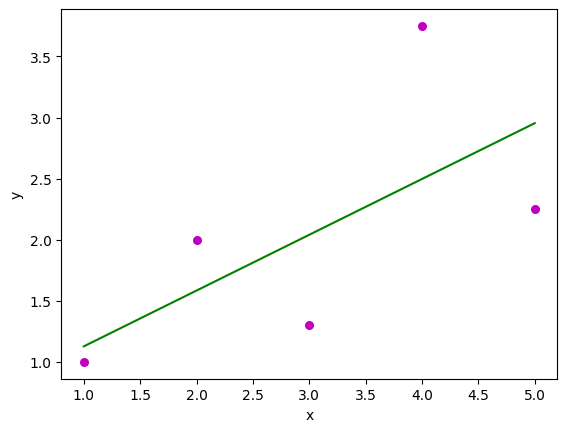

In [ ]:
plot_regression_line(x, y, result)